##### 新潟大学大学院医歯学総合研究科　顎顔面放射線学分野　学生演習用
Modified by H.Nishiyama<br>
Fork from :https://github.com/oreilly-japan/deep-learning-from-scratch-5

```os.path.dirname(__file__)```<br>
はローカル実行環境ではエラーとなるので、<br>
```os.getcwd()```<br>
に修正した（オリジナルコードは```#=#```でコメントアウトしている）<br>
なお、ファイルの場所が同じフォルダ内なら、```os.path.join```も不要で、直接```np.loadtxt(path)```の```path```にファイル名（```'old_faithful.txt'```）を入れるだけで良い。<br>
【注意】オリジナルコードとして同梱されている「notebooks」フォルダ内のコードをローカルで直接実行すると同一フォルダ内に該当するデータファイルが存在しないのでエラーが発生する。<br>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#=# path = os.path.join(os.path.dirname(__file__), 'old_faithful.txt')
path = os.path.join(os.getcwd(), 'old_faithful.txt')
original_xs = np.loadtxt(path)

In [3]:
# learned parameters
mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
phis = np.array([0.35, 0.65])

In [4]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

In [5]:
def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

EMにて算出されたパラメータに基づいて、生成したもの（乱数を用いシミュレーションしたもの）と、元データの重ね合わせ。

In [6]:
# genearte data
N = 500
new_xs = np.zeros((N, 2))
for n in range(N):
    k = np.random.choice(2, p=phis)
    mu, cov = mus[k], covs[k]
    new_xs[n] = np.random.multivariate_normal(mu, cov)

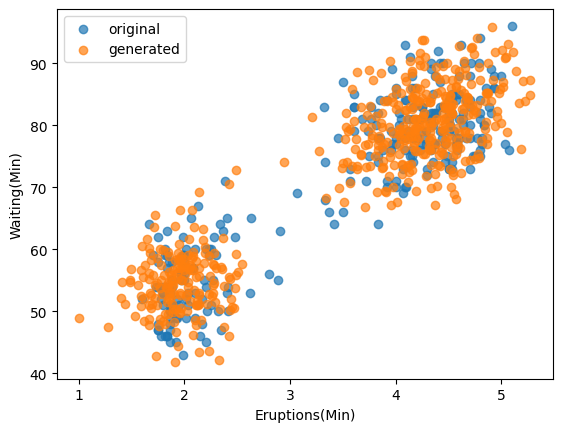

In [7]:
# visualize
plt.scatter(original_xs[:,0], original_xs[:,1], alpha=0.7, label='original')
plt.scatter(new_xs[:,0], new_xs[:,1], alpha=0.7, label='generated')
plt.legend()
plt.xlabel('Eruptions(Min)')
plt.ylabel('Waiting(Min)')
plt.show()